In [31]:
%matplotlib ipympl

import numpy as np
import pandas as pd

from scipy.signal import butter, filtfilt, welch
import sys
import pywt
import util
import matplotlib.pyplot as plt
# import matplotlib
# matplotlib.use('module://ipympl.backend_nbagg')
# import matplotlib.pyplot as plt

# interactive plotting with %matplotlib notebook

!ls ../recordings

2025-03-21_16-10_gain24_boardAds1299_vref4.5.csv
march-25-test.csv


In [ ]:
print('Load data and get properties\n')
fname = '2025-03-21_16-10_gain24_boardAds1299_vref4.5.csv'

# fname = 'march-25-test.csv'
df = pd.read_csv(f"../recordings/{fname}")
fname = '2025-03-21_16-10_gain24_boardAds1299_vref4.5.csv'

board, gain, Fs, vref, avss, resolution, vmid = util.get_board_attributes(fname)
channel_count = len([i for i in list(df.columns) if i.find('_raw_sample') !=-1])
df = util.add_time_and_raw_voltage_columns(df, fname)

print(f"\nvref={vref}V, avss={avss}V, gain={gain}, sample_rate={Fs}hz, vmid={vmid}, resolution={resolution} bit")
print('\nchannel count=', channel_count)
print('\ndf columns=', list(df.columns), '\n')

trim_time = 4.0  # seconds to trim from start
start_index = int(trim_time * Fs)

Load data and get properties

added these new columns, ['time_sec', 'ch1_raw_voltage', 'ch2_raw_voltage', 'ch3_raw_voltage', 'ch4_raw_voltage']

vref=4.5V, avss=0V, gain=24.0, sample_rate=250.0hz, vmid=2.25, resolution=24 bit

channel count= 4

df columns= ['timestamp', 'ch1_voltage', 'ch2_voltage', 'ch3_voltage', 'ch4_voltage', 'ch1_raw_sample', 'ch2_raw_sample', 'ch3_raw_sample', 'ch4_raw_sample', 'time_sec', 'ch1_raw_voltage', 'ch2_raw_voltage', 'ch3_raw_voltage', 'ch4_raw_voltage'] 



(<Figure size 800x1200 with 3 Axes>,
 array([<Axes: title={'center': 'No-Filter Voltage FFT'}, ylabel='Magnitude'>,
        <Axes: title={'center': 'EEG Voltage FFT'}, ylabel='Magnitude'>,
        <Axes: title={'center': 'Expected Voltage FFT'}, xlabel='Frequency (Hz)', ylabel='Magnitude'>],
       dtype=object))

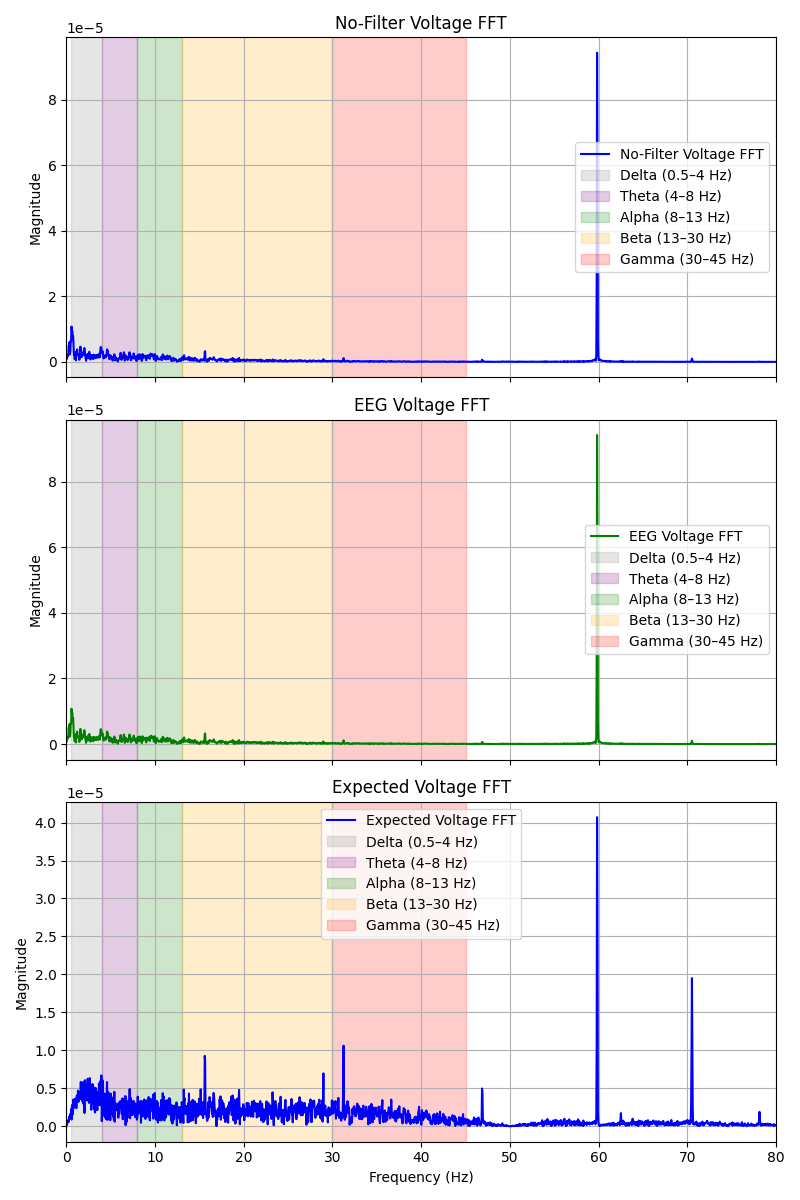

In [37]:
sim_order = 2
sim_lowcut = 2
sim_highcut = 45
sim_notch_q = 4

# Get signals
displayed_gui_voltage = df['ch2_voltage'].values[start_index:]
ch2_raw_voltage = df['ch2_raw_voltage'].values[start_index:]
sim_gui_voltage = util.eeg_board_filter(ch2_raw_voltage, Fs, sim_order, sim_lowcut, sim_highcut, sim_notch_q)

# Hamming
displayed_gui_voltage = displayed_gui_voltage * np.hamming( len(displayed_gui_voltage))
sim_gui_voltage = sim_gui_voltage * np.hamming( len(sim_gui_voltage))
ch2_raw_voltage = ch2_raw_voltage * np.hamming( len(ch2_raw_voltage))

# plot fft's
util.plot_ffts(Fs, [(displayed_gui_voltage, "No-Filter Voltage FFT"), (displayed_gui_voltage, "EEG Voltage FFT"), (sim_gui_voltage, "Expected Voltage FFT")])